In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)
#city_df.head()
#ride_df.head()
# Combine the data into a single dataset
combined_df=pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

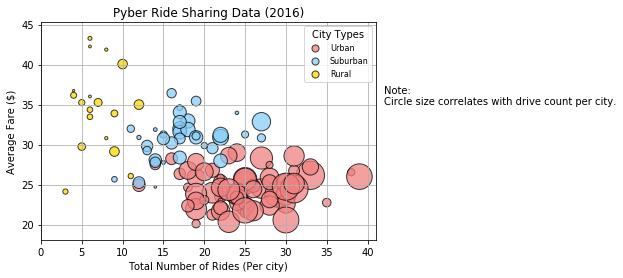

In [72]:
# Obtain the x and y coordinates for each of the three city types
grouped_df=combined_df.groupby(["type","city"])
city_count_df=grouped_df["ride_id"].count()
#print(city_count_df)

total_rides_rural=city_count_df["Rural"]
#print(total_rides_rural)

total_rides_suburban=city_count_df["Suburban"]
#print(total_rides_suburban)

total_rides_urban=city_count_df["Urban"]
#print(total_rides_urban)

avg_fare_rural=grouped_df["fare"].mean()["Rural"]
#print(avg_fare_rural)

avg_fare_suburban=grouped_df["fare"].mean()["Suburban"]
#print(avg_fare_suburban)

avg_fare_urban=grouped_df["fare"].mean()["Urban"]
#print(avg_fare_urban)

total_drivers_rural=grouped_df["driver_count"].sum()["Rural"]
#print(total_drivers_rural)
total_drivers_suburban=grouped_df["driver_count"].sum()["Suburban"]
#print(total_drivers_suburban)
total_drivers_urban=grouped_df["driver_count"].sum()["Urban"]
#print(total_drivers_urban)

# Build the scatter plots for each city types
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel ("Average Fare ($)")
plt.grid()

# I have adjusted the size of the bubbles for aesthetics. I don't know if that is fine. 
urban =plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*0.35, marker ="o",facecolor="lightcoral", edgecolor="black", alpha=0.75, label="Urban")
suburban =plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*0.5, marker ="o", facecolor="lightskyblue", edgecolor="black", alpha =0.75, label = "Suburban")
rural =plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*1.3, marker ="o", facecolor ="gold", edgecolor="black", alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.xlim(0, city_count_df.max()+2)
plt.ylim(grouped_df["fare"].mean().min()-2, grouped_df["fare"].mean().max()+2)


# Create a legend
legend = plt.legend(handles=[urban,suburban,rural], fontsize=8, title="City Types", loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with drive count per city.")

# Save Figure
plt.savefig("Ride_Share_Data.png")
# Show plot
plt.show()

## Total Fares by City Type

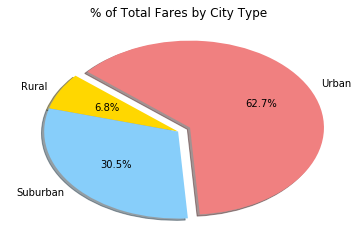

In [59]:
# Calculate Type Percents
type_group_df=combined_df.groupby("type")
#type_group_df.count()

total_fares=type_group_df["fare"].sum()
#print(total_fares)

labels=total_fares.index
#print(labels)

colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,0.1]

# Build Pie Chart
plt.pie(total_fares, labels=labels, colors=colors, explode=explode, autopct="%0.1f%%", startangle=140, shadow=True)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type.png")

In [54]:
# Show Figure
plt.show()

## Total Rides by City Type

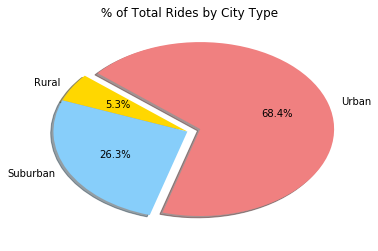

In [60]:
# Calculate Ride Percents
type_group_df=combined_df.groupby("type")

total_rides=type_group_df["ride_id"].count()
#print(total_rides)

labels=total_rides.index

colors=["gold", "lightskyblue", "lightcoral"]

explode=[0,0,0.1]

# Build Pie Chart
plt.pie(total_rides, labels=labels, colors=colors, explode=explode, autopct="%0.1f%%", startangle=140, shadow=True)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type.png")

In [61]:
# Show Figure
plt.show()

## Total Drivers by City Type

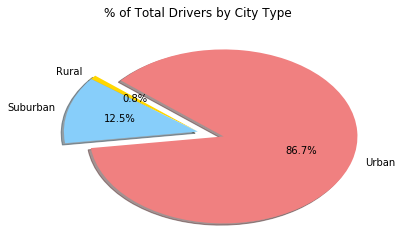

In [67]:
# Calculate Driver Percents
type_group_df=combined_df.groupby("type")

total_drivers=type_group_df["driver_count"].sum()
#print(total_drivers)

# Build Pie Charts
labels=total_drivers.index

colors=["gold", "lightskyblue", "lightcoral"]

explode=[0,0,0.2]

plt.pie(total_drivers, labels=labels, colors=colors, explode=explode, autopct="%0.1f%%", startangle=140, shadow=True)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type.png")

In [ ]:
# Show Figure
plt.show()